### Task 1:
Download a RGB color image from the web and save it to your working directory

We are using the *brain_scan.png* image, which should be downloaded from the folder and imported.

/tmp/ipython-input-1500601903.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I)
/tmp/ipython-input-1500601903.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


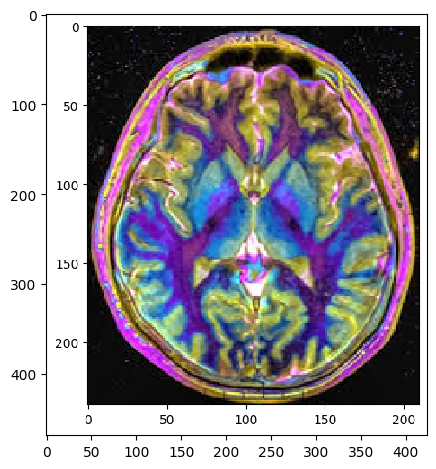

In [102]:
import skimage as sk
from skimage.io import imread

I = sk.io.imread('/content/brain_scan.png')
sk.io.imshow(I)
sk.io.show()

### Task 2:

Load the image in Python and answer the following questions:

a) How many pixels are there in the image?
**198856**

b) How many channels, rows and columns?
**4 channels, 469 rows, 424 columns**

c) What is the format in which each pixel is encoded (number of bits)?
**8 bits per channel (values 0-255)**

d) How may pixels are need in order to encode the whole image?
**6363392**    

In [103]:
# Get rows, columns, and channels
if len(I.shape) == 3: # RGB or RGBA image
    rows, cols, channels = I.shape
else: # Greyscale image
    rows, cols = I.shape
    channels = 1

# Number of pixels in the image
num_pixels = rows * cols

# Bits per pixel channel
bits_per_channel = I.dtype.itemsize * 8

# Total bits needed to encode the whole image
total_bits = rows * cols * channels * bits_per_channel

print(f"a) Number of pixels in the image: {num_pixels}")
print(f"b) Number of channels, rows, and columns: {channels} channels, {rows} rows, {cols} columns")
print(f"c) Each pixel channel is encoded with {bits_per_channel} bits ({I.dtype})")
print(f"d) Total bits needed to encode the whole image: {total_bits}")

a) Number of pixels in the image: 198856
b) Number of channels, rows, and columns: 4 channels, 469 rows, 424 columns
c) Each pixel channel is encoded with 8 bits (uint8)
d) Total bits needed to encode the whole image: 6363392


### Task 3:

Convert the color image to grayscale and answer the questions:

a) How many pixels of the image have a grayscale level equal zero?
**2853**

b) What is the total fracion of zero-valued pixels in the image?
**0.0143**

/tmp/ipython-input-114139215.py:10: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.imshow(I_gray)
/tmp/ipython-input-114139215.py:11: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  sk.io.show()


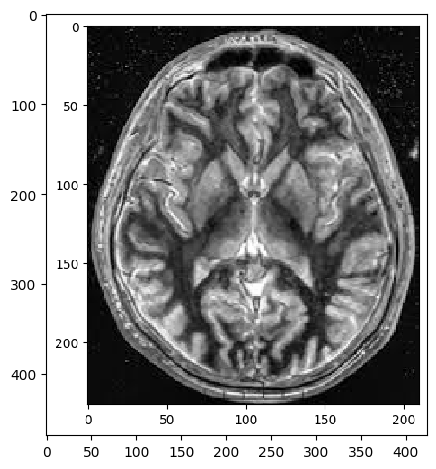

a) Number of pixels with grayscale level 0: 2853
b) Fraction of zero-valued pixels: 0.0143


In [104]:
from skimage.color import rgb2gray
import numpy as np

# Remove alpha channel (keep only RGB)
I_rgb = I[:, :, :3]

# Convert RGB to grayscale
I_gray = rgb2gray(I_rgb)

sk.io.imshow(I_gray)
sk.io.show()

# Convert to 8-bit integer (0-255) for easier counting
I_gray_uint8 = (I_gray * 255).astype(np.uint8)

# a) Number of pixels with grayscale level 0
num_zero_pixels = np.sum(I_gray_uint8 == 0)
print(f"a) Number of pixels with grayscale level 0: {num_zero_pixels}")

# b) Fraction of zero-valued pixels
total_pixels = I_gray_uint8.size # 2D, therefore size = total pixels
fraction_zero = num_zero_pixels / total_pixels
print(f"b) Fraction of zero-valued pixels: {fraction_zero:.4f}")

### Task 4:

Compare the following two approaches to convert the color image to grayscale:

    Approach 1: Using the skimage function sk.color.rgb2gray as in the example above.
    Approach 2: Applying the transformation $IG = 0.2125 \cdot R + 0.7154\cdot G + 0.0721\cdot B$
where R,G and B are the Red, Green and Blue color channels of the image.

Are both results completly equivalent? Explain.

### Approach 1

rgb2gray automatically converts RGB to grayscale using standard luminance weights.

According to scikit-image documentation:

𝐼𝐺 = 0.2125 ⋅ 𝑅 + 0.7154 ⋅ 𝐺 + 0.0721 ⋅ 𝐵

IG is returned as a floating-point 2D array with values in 0–1.

In [105]:
IG1 = rgb2gray(I_rgb)

### Approach 2

Manually applying the same formula to each channel. Dividing by 255 in order to normalize to 0-1 to match rgb2gray

In [106]:
IG2 = (0.2125*I_rgb[:,:,0] + 0.7154*I_rgb[:,:,1] + 0.0721*I_rgb[:,:,2]) / 255.0

### Comparison

In [107]:
difference = np.abs(IG1 - IG2)
print("Maximum difference between approaches:", np.max(difference))

Maximum difference between approaches: 3.3306690738754696e-16


Both methods for converting a color image to grayscale — using `rgb2gray` or the manual weighted sum — give almost the same result since they are mathematically equivalent. Any tiny differences are just due to rounding, so both can be used interchangeably.
The number 3.33 × 10⁻¹⁶ we get from the difference of the two grayscale images is effectively zero — it’s just a tiny floating-point rounding error.


### Task 5:

Create a figure arranged in 1 columns and 3 rows with each panel represents the histogram of each color channel of the color image. Each panel should have a subtitle and the axis should be properly labeled.

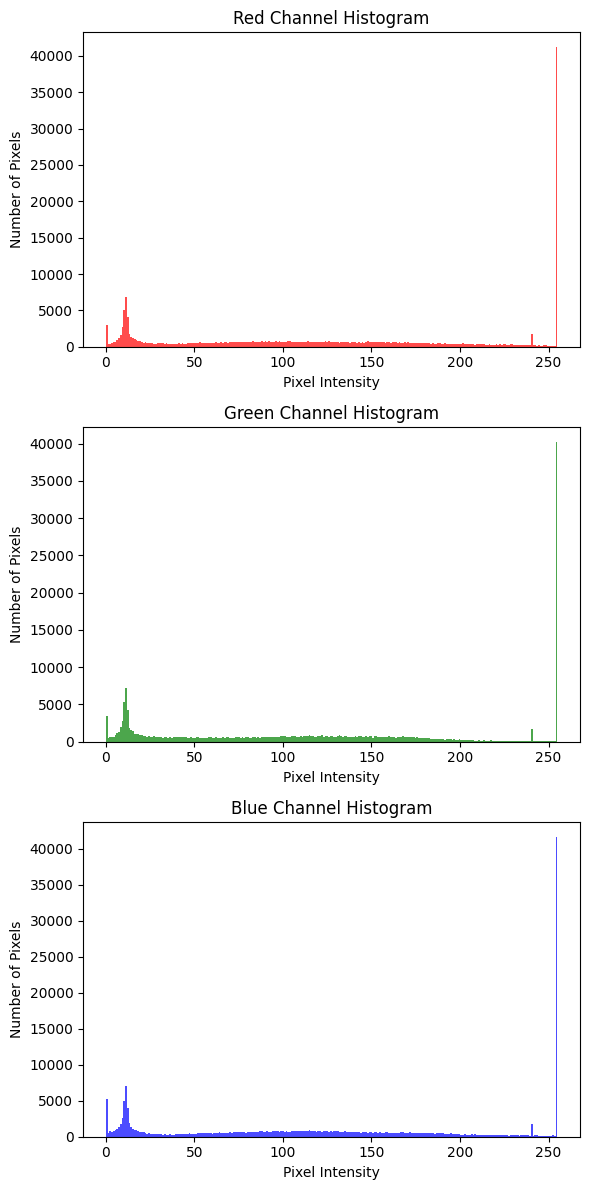

In [108]:
import matplotlib.pyplot as plt

R = I_rgb[:, :, 0]
G = I_rgb[:, :, 1]
B = I_rgb[:, :, 2]

# Create figure with 3 rows and 1 column
fig1, axes = plt.subplots(3, 1, figsize=(6, 12))  # width x height

# histogram for Red channel
axes[0].hist(R.ravel(), bins=256, color='red', alpha=0.7)
axes[0].set_title("Red Channel Histogram")
axes[0].set_xlabel("Pixel Intensity")
axes[0].set_ylabel("Number of Pixels")

# histogram for Green channel
axes[1].hist(G.ravel(), bins=256, color='green', alpha=0.7)
axes[1].set_title("Green Channel Histogram")
axes[1].set_xlabel("Pixel Intensity")
axes[1].set_ylabel("Number of Pixels")

# histogram for Blue channel
axes[2].hist(B.ravel(), bins=256, color='blue', alpha=0.7)
axes[2].set_title("Blue Channel Histogram")
axes[2].set_xlabel("Pixel Intensity")
axes[2].set_ylabel("Number of Pixels")

plt.tight_layout()
plt.show()

### Task 6:
Represent the cummulative probability distribution of the grayscale image and indicate which is the median pixel value. Make sure the axis are properly labeled in the figure.

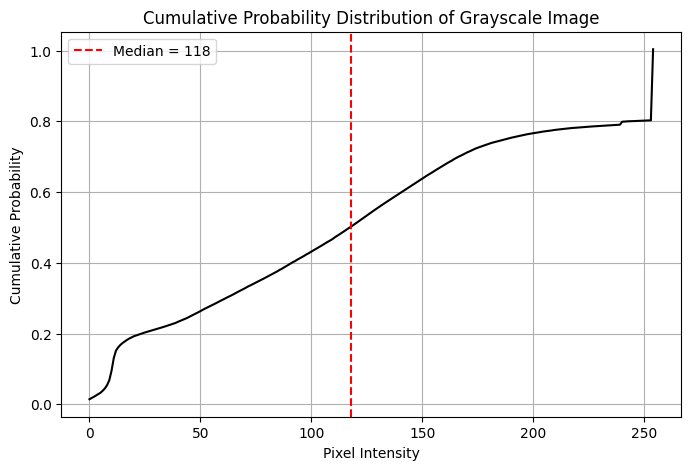

In [109]:
# Compute histogram
hist, bins = np.histogram(I_gray_uint8.flatten(), bins=256, range=[0, 255], density=True)

# Compute cumulative distribution (CDF)
cdf = np.cumsum(hist)

# Find median pixel value
median_pixel = np.searchsorted(cdf, 0.5)  # index where CDF >= 0.5

fig2 = plt.figure(figsize=(8,5))
plt.plot(bins[:-1], cdf, color='black')
plt.axvline(median_pixel, color='red', linestyle='--', label=f'Median = {median_pixel}')
plt.title("Cumulative Probability Distribution of Grayscale Image")
plt.xlabel("Pixel Intensity")
plt.ylabel("Cumulative Probability")
plt.legend()
plt.grid(True)
plt.show()

### Task 7:

Obtain the mean and standard deviation of the pixel values in the image

In [110]:
mean_pixel = np.mean(I_gray_uint8)
std_pixel = np.std(I_gray_uint8)

print(f"Mean pixel value: {mean_pixel:.2f}")
print(f"Standard deviation of pixel values: {std_pixel:.2f}")

Mean pixel value: 124.34
Standard deviation of pixel values: 87.30


### Task 8:

Binarize the image by setting to one the pixels with a value larger or equal than the median and to zero the pixels below the median.

/tmp/ipython-input-1117322850.py:5: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(I_binary)
/usr/local/lib/python3.12/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/tmp/ipython-input-1117322850.py:6: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  show()


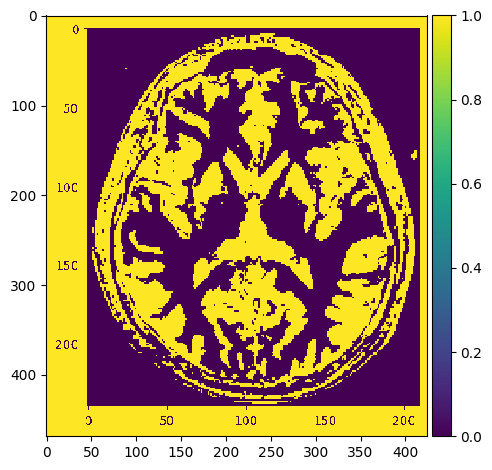

/tmp/ipython-input-1117322850.py:8: FutureWarning: `imshow` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  imshow(I_binary, cmap='gray')  # Force grayscale display
/usr/local/lib/python3.12/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:158: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)
/tmp/ipython-input-1117322850.py:9: FutureWarning: `show` is deprecated since version 0.25 and will be removed in version 0.27. Please use `matplotlib`, `napari`, etc. to visualize images.
  show()


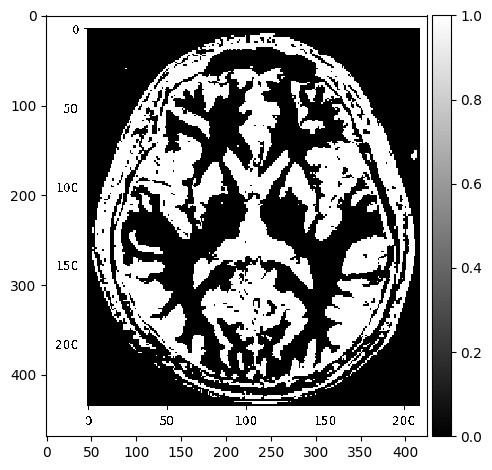

In [111]:
I_binary = np.zeros_like(I_gray_uint8)          # create an array of zeros
I_binary[I_gray_uint8 >= median_pixel] = 1      # set pixels >= median to 1

from skimage.io import imshow, show
imshow(I_binary)
show()

imshow(I_binary, cmap='gray')  # Force grayscale display
show()

### Task 9:

Export the figures in the report in 'png' format.

In [112]:
from skimage.io import imsave

imsave('grayscale_image.png', (I_gray * 255).astype(np.uint8))
imsave('binarized_image.png', (I_binary * 255).astype(np.uint8))

fig1.savefig("color_channel_histograms.png", dpi=300, bbox_inches='tight')
fig2.savefig("grayscale_cdf.png", dpi=300, bbox_inches='tight')

print("All images successfully saved!")

All images successfully saved!


### Task 10:  
Provide a list of 10 new different things that you have learned after following this tutorial.

- How to load images in Python using skimage.io.imread() and display them.

- How to check image dimensions (rows, columns, channels) and the number of pixels.

- How to determine the bit depth of an image and calculate the total memory needed.

- How to convert a color image (RGB/RGBA) to grayscale using rgb2gray() and a manual weighted sum.

- How to count pixels with specific values and compute fractions (e.g., zero-valued pixels).

- How to plot histograms of individual color channels using Matplotlib.

- How to compute and plot the cumulative distribution (CDF) of a grayscale image and identify the median pixel.

- How to calculate the mean and standard deviation of pixel values.

- How to binarize an image based on a threshold (median pixel value).

- How to export images and figures as PNG files, and the difference between displayed colormaps and actual saved image values.

**Team Members**:
- Apostolia Maria Sofianopoulou
- Paula Eva Wagner
- Sandra Catalina Parra Navarrete